In [1]:
import os

assert os.environ['CONDA_DEFAULT_ENV']=='toi5671'

https://github.com/TeHanHunter/TESS_Gaia_Light_Curve/blob/main/tutorial/TGLC_tutorial.ipynb

In [2]:
#output of cpm
ls ../data/*astrocut.fits

../data/tess-s0016-4-4_211.009466_38.618266_50x50_astrocut.fits
../data/tess-s0023-2-2_211.009466_38.618266_50x50_astrocut.fits
../data/tess-s0050-2-2_211.009466_38.618266_50x50_astrocut.fits


https://exofop.ipac.caltech.edu/tess/target.php?id=TOI-5671

In [3]:
import os
import numpy as np
import matplotlib.pyplot as plt
from tglc.quick_lc import tglc_lc

target = 'TIC 23863105'     # TIC ID (preferred, 'TIC 12345678'), Target ID ('TOI 519') or coordinates ('ra dec')
local_directory = '../data/'
tglc_lc(target=target, 
        local_directory=local_directory, 
        size=50, # FFI cutsize. Recommand at least 50 or larger for better performance. Cannot exceed 99. 
                 # Downloading FFI might take longer (or even cause timeouterror) for larger sizes. 
        save_aper=True, # whether to save 5*5 pixels timeseries of the decontaminated images in fits file primary HDU
        limit_mag=16, # the TESS magnitude lower limit of stars to output
        get_all_lc=True, # whether to return all lcs in the region. If False, return the nearest star to the target coordinate
        first_sector_only=False, # whether to return only lcs from the sector this target was first observed. 
                                # If False, return all sectors of the target, but too many sectors could be slow to download.
        last_sector_only=False, # whether to return only lcs from the sector this target was last observed. 
        sector=None, # If first_sector_only = True or last_sector_only = True and type(sector) != int, return first or last sector.
                     # If first(last)_sector_only=False and sector = None, return all observed sectors
                     # If first(last)_sector_only=False and type(sector) == int, return only selected sector. 
                     # (Make sure only put observed sectors. All available sectors are printed in the sector table.)
        prior=None)  # If None, does not allow all field stars to float. SUGGESTED for first use. 
                     # If float (usually <1), allow field stars to float with a Gaussian prior with the mean 
                     # at the Gaia predicted value the width of the prior value multiplied on the Gaia predicted value.

Target: TIC 23863105
  sectorName   sector camera ccd
-------------- ------ ------ ---
tess-s0016-4-4     16      4   4
tess-s0023-2-2     23      2   2
tess-s0050-2-2     50      2   2
Processing all available sectors of the target.
################################################
  sectorName   sector camera ccd
-------------- ------ ------ ---
tess-s0016-4-4     16      4   4
tess-s0023-2-2     23      2   2
tess-s0050-2-2     50      2   2
Loaded ffi_cut from directory. 
Loaded ePSF TIC 23863105 from directory. 


Fitting lc: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 34/34 [00:02<00:00, 14.01it/s]


################################################
  sectorName   sector camera ccd
-------------- ------ ------ ---
tess-s0016-4-4     16      4   4
tess-s0023-2-2     23      2   2
tess-s0050-2-2     50      2   2
Loaded ffi_cut from directory. 
Loaded ePSF TIC 23863105 from directory. 


Fitting lc: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 39/39 [00:02<00:00, 14.50it/s]


################################################
  sectorName   sector camera ccd
-------------- ------ ------ ---
tess-s0016-4-4     16      4   4
tess-s0023-2-2     23      2   2
tess-s0050-2-2     50      2   2
Loaded ffi_cut from directory. 
Loaded ePSF TIC 23863105 from directory. 


Fitting lc: 100%|█████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████████| 39/39 [00:06<00:00,  5.89it/s]


In [4]:
from astropy.io import fits

hdul_s16 = fits.open('../data/lc/hlsp_tglc_tess_ffi_gaiaid-1485436090253564928-s0016-cam4-ccd4_tess_v1_llc.fits')
hdul_s16.info()

Filename: ../data/lc/hlsp_tglc_tess_ffi_gaiaid-1485436090253564928-s0016-cam4-ccd4_tess_v1_llc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (5, 5, 1121)   float32   
  1  LIGHTCURVE    1 BinTableHDU     59   1121R x 9C   [D, E, E, E, E, E, J, I, I]   


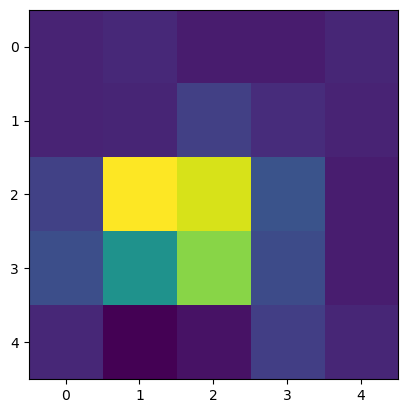

In [5]:
import matplotlib.pyplot as pl

pl.imshow(hdul_s16[0].data[0,:])

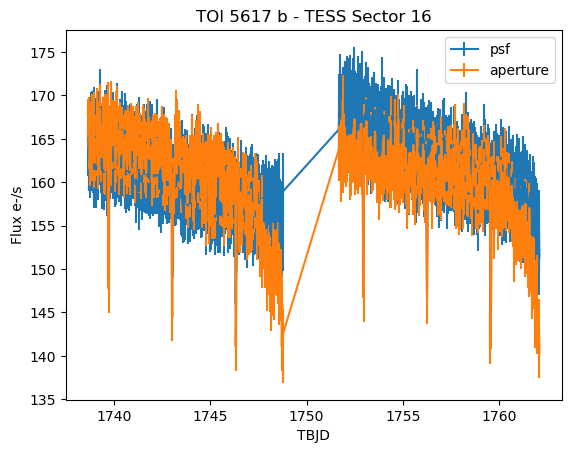

In [6]:
q_16 = [a and b for a, b in zip(list(hdul_s16[1].data['TESS_flags'] == 0),
                                list(hdul_s16[1].data['TGLC_flags'] == 0))]
# filter out bad datapoints from both TESS FFI flags and TGLC flags

time_16 = hdul_s16[1].data['time'][q_16]
psf_flux_16 = hdul_s16[1].data['psf_flux'][q_16] # raw psf flux
psf_flux_err_16 = hdul_s16[1].header['PSF_ERR'] # raw psf flux error
aper_flux_16 = hdul_s16[1].data['aperture_flux'][q_16] # raw aper flux
aper_flux_err_16 = hdul_s16[1].header['APER_ERR'] # raw aper flux error
plt.errorbar(time_16, psf_flux_16, psf_flux_err_16, marker = '', label = 'psf')
plt.errorbar(time_16, aper_flux_16, aper_flux_err_16, marker = '', label = 'aperture')
plt.title('TOI 5617 b - TESS Sector 16')
plt.xlabel('TBJD')
plt.ylabel('Flux e-/s')
plt.legend()
plt.show()

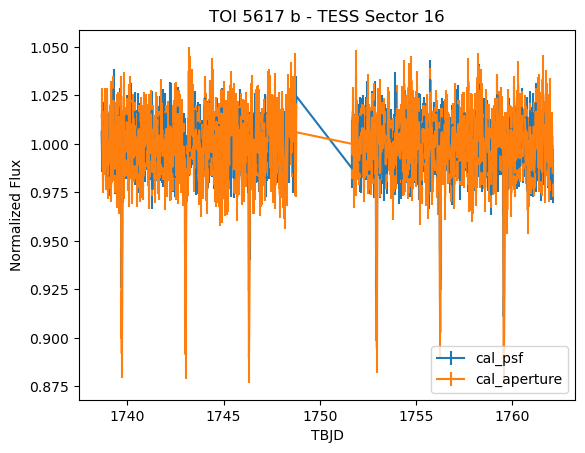

In [8]:
cal_psf_flux_16 = hdul_s16[1].data['cal_psf_flux'][q_16] # calibrated psf flux
cal_psf_flux_err_16 = hdul_s16[1].header['CPSF_ERR'] # calibrated psf flux error
cal_aper_flux_16 = hdul_s16[1].data['cal_aper_flux'][q_16] # calibrated aper flux
cal_aper_flux_err_16 = hdul_s16[1].header['CAPE_ERR'] # calibrated aper flux error
plt.errorbar(time_16, cal_psf_flux_16, cal_psf_flux_err_16, marker = '', label = 'cal_psf')
plt.errorbar(time_16, cal_aper_flux_16, cal_aper_flux_err_16, marker = '', label = 'cal_aperture')
plt.title('TOI 5617 b - TESS Sector 16')
plt.xlabel('TBJD')
plt.ylabel('Normalized Flux')
plt.legend()
plt.show()

In [9]:
from astropy.io import fits

hdul_s23 = fits.open('../data/lc/hlsp_tglc_tess_ffi_gaiaid-1485436090253564928-s0023-cam2-ccd2_tess_v1_llc.fits')
hdul_s23.info()

Filename: ../data/lc/hlsp_tglc_tess_ffi_gaiaid-1485436090253564928-s0023-cam2-ccd2_tess_v1_llc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (5, 5, 1238)   float32   
  1  LIGHTCURVE    1 BinTableHDU     59   1238R x 9C   [D, E, E, E, E, E, J, I, I]   


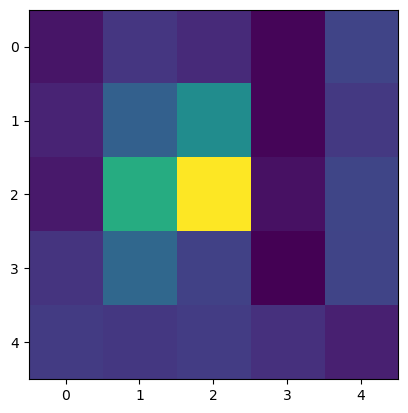

In [10]:
import matplotlib.pyplot as pl

pl.imshow(hdul_s23[0].data[0,:])

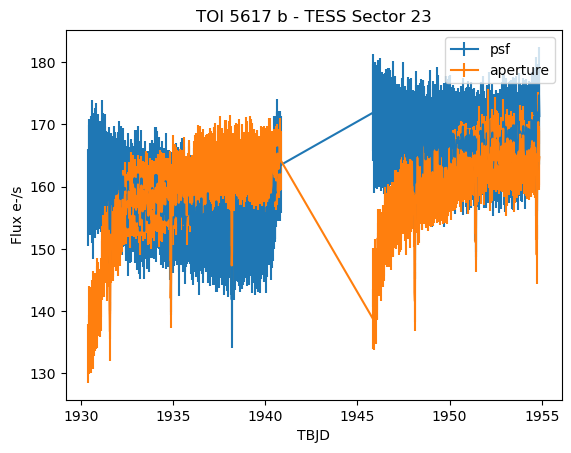

In [11]:
q_23 = [a and b for a, b in zip(list(hdul_s23[1].data['TESS_flags'] == 0),
                                list(hdul_s23[1].data['TGLC_flags'] == 0))]
# filter out bad datapoints from both TESS FFI flags and TGLC flags

time_23 = hdul_s23[1].data['time'][q_23]
psf_flux_23 = hdul_s23[1].data['psf_flux'][q_23] # raw psf flux
psf_flux_err_23 = hdul_s23[1].header['PSF_ERR'] # raw psf flux error
aper_flux_23 = hdul_s23[1].data['aperture_flux'][q_23] # raw aper flux
aper_flux_err_23 = hdul_s23[1].header['APER_ERR'] # raw aper flux error
plt.errorbar(time_23, psf_flux_23, psf_flux_err_23, marker = '', label = 'psf')
plt.errorbar(time_23, aper_flux_23, aper_flux_err_23, marker = '', label = 'aperture')
plt.title('TOI 5617 b - TESS Sector 23')
plt.xlabel('TBJD')
plt.ylabel('Flux e-/s')
plt.legend()
plt.show()

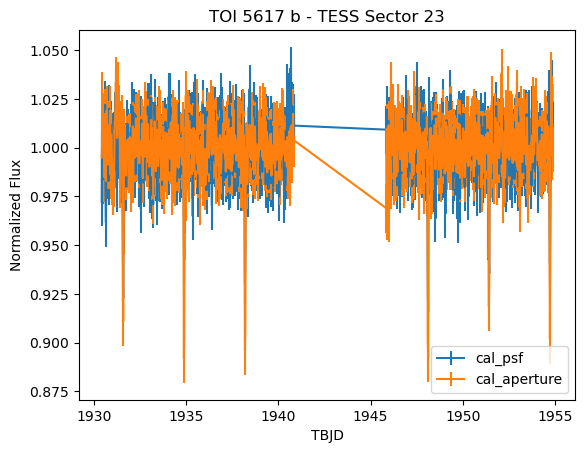

In [12]:
cal_psf_flux_23 = hdul_s23[1].data['cal_psf_flux'][q_23] # calibrated psf flux
cal_psf_flux_err_23 = hdul_s23[1].header['CPSF_ERR'] # calibrated psf flux error
cal_aper_flux_23 = hdul_s23[1].data['cal_aper_flux'][q_23] # calibrated aper flux
cal_aper_flux_err_23 = hdul_s23[1].header['CAPE_ERR'] # calibrated aper flux error
plt.errorbar(time_23, cal_psf_flux_23, cal_psf_flux_err_23, marker = '', label = 'cal_psf')
plt.errorbar(time_23, cal_aper_flux_23, cal_aper_flux_err_23, marker = '', label = 'cal_aperture')
plt.title('TOI 5617 b - TESS Sector 23')
plt.xlabel('TBJD')
plt.ylabel('Normalized Flux')
plt.legend()
plt.show()

In [13]:
from astropy.io import fits

hdul_s50 = fits.open('../data/lc/hlsp_tglc_tess_ffi_gaiaid-1485436090253564928-s0050-cam2-ccd2_tess_v1_llc.fits')
hdul_s50.info()

Filename: ../data/lc/hlsp_tglc_tess_ffi_gaiaid-1485436090253564928-s0050-cam2-ccd2_tess_v1_llc.fits
No.    Name      Ver    Type      Cards   Dimensions   Format
  0  PRIMARY       1 PrimaryHDU      38   (5, 5, 3623)   float32   
  1  LIGHTCURVE    1 BinTableHDU     59   3623R x 9C   [D, E, E, E, E, E, J, I, I]   


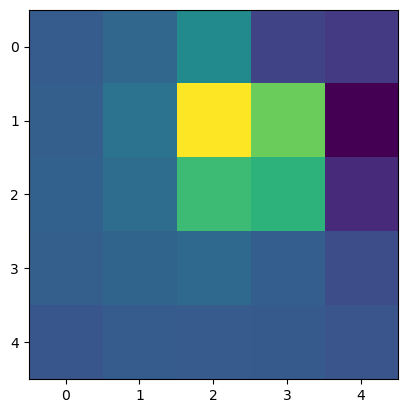

In [14]:
import matplotlib.pyplot as pl

pl.imshow(hdul_s50[0].data[0,:])

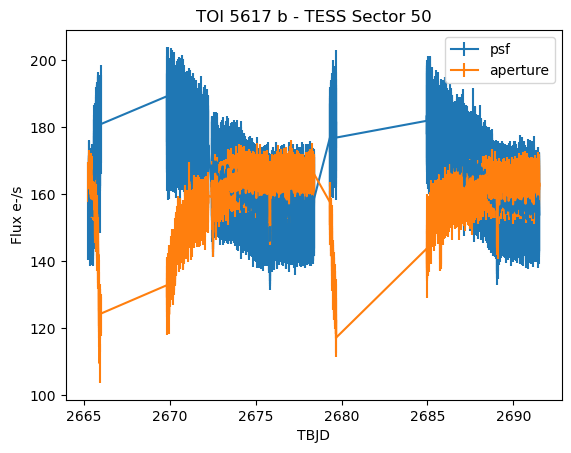

In [15]:
q_50 = [a and b for a, b in zip(list(hdul_s50[1].data['TESS_flags'] == 0),
                                list(hdul_s50[1].data['TGLC_flags'] == 0))]
# filter out bad datapoints from both TESS FFI flags and TGLC flags

time_50 = hdul_s50[1].data['time'][q_50]
psf_flux_50 = hdul_s50[1].data['psf_flux'][q_50] # raw psf flux
psf_flux_err_50 = hdul_s50[1].header['PSF_ERR'] # raw psf flux error
aper_flux_50 = hdul_s50[1].data['aperture_flux'][q_50] # raw aper flux
aper_flux_err_50 = hdul_s50[1].header['APER_ERR'] # raw aper flux error
plt.errorbar(time_50, psf_flux_50, psf_flux_err_50, marker = '', label = 'psf')
plt.errorbar(time_50, aper_flux_50, aper_flux_err_50, marker = '', label = 'aperture')
plt.title('TOI 5617 b - TESS Sector 50')
plt.xlabel('TBJD')
plt.ylabel('Flux e-/s')
plt.legend()
plt.show()

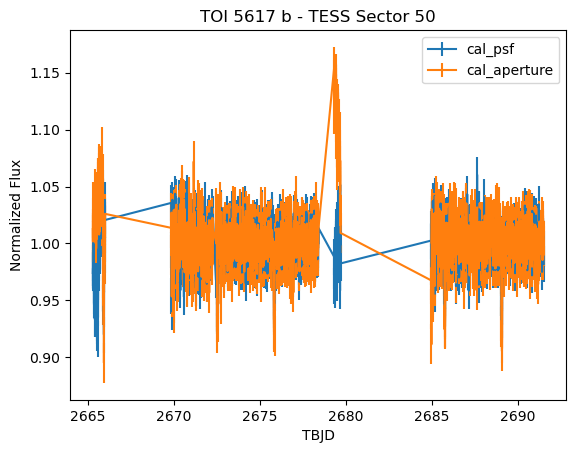

In [16]:
cal_psf_flux_50 = hdul_s50[1].data['cal_psf_flux'][q_50] # calibrated psf flux
cal_psf_flux_err_50 = hdul_s50[1].header['CPSF_ERR'] # calibrated psf flux error
cal_aper_flux_50 = hdul_s50[1].data['cal_aper_flux'][q_50] # calibrated aper flux
cal_aper_flux_err_50 = hdul_s50[1].header['CAPE_ERR'] # calibrated aper flux error
plt.errorbar(time_50, cal_psf_flux_50, cal_psf_flux_err_50, marker = '', label = 'cal_psf')
plt.errorbar(time_50, cal_aper_flux_50, cal_aper_flux_err_50, marker = '', label = 'cal_aperture')
plt.title('TOI 5617 b - TESS Sector 50')
plt.xlabel('TBJD')
plt.ylabel('Normalized Flux')
plt.legend()
plt.show()

(0.8, 1.1)

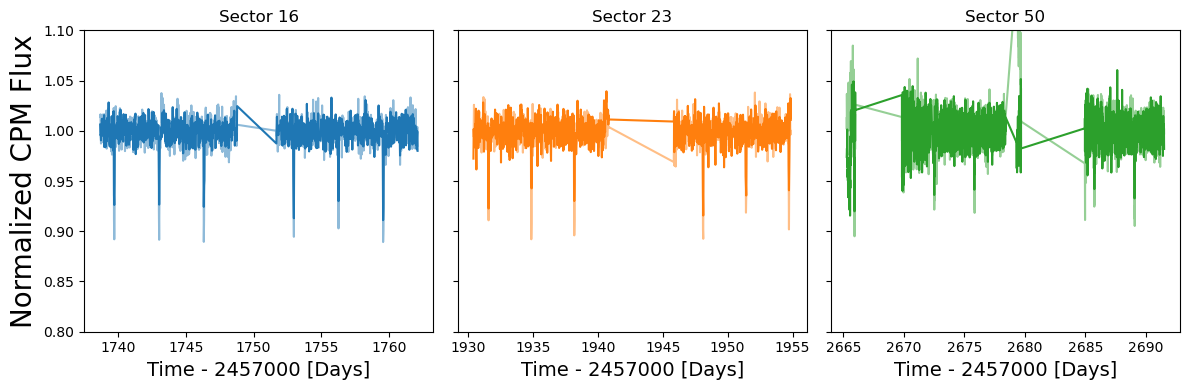

In [17]:
fig, axs = plt.subplots(1,3, figsize=(12, 4), sharey=True, tight_layout=True)
ax = axs.flatten()
ax[0].plot(time_16, cal_aper_flux_16, c="C0", label="Sector 16", alpha=0.5)
ax[0].plot(time_16, cal_psf_flux_16, c="C0", label="Sector 16")
ax[1].plot(time_23, cal_aper_flux_23, c="C1", label="Sector 23", alpha=0.5)
ax[1].plot(time_23, cal_psf_flux_23, c="C1", label="Sector 23")
ax[2].plot(time_50, cal_aper_flux_50, c="C2", label="Sector 50", alpha=0.5)
ax[2].plot(time_50, cal_psf_flux_50, c="C2", label="Sector 50")

ax[0].set_xlabel("Time - 2457000 [Days]", fontsize=14)
ax[1].set_xlabel("Time - 2457000 [Days]", fontsize=14)
ax[2].set_xlabel("Time - 2457000 [Days]", fontsize=14)
ax[0].set_ylabel("Normalized CPM Flux", fontsize=20)
ax[0].set_title("Sector 16")
ax[1].set_title("Sector 23")
ax[2].set_title("Sector 50")
ax[-1].set_ylim(0.8, 1.1)
# savefig(fig, '../figures/tess_cpm_lightcurves.png', dpi=300, writepdf=False)

(0.8, 1.1)

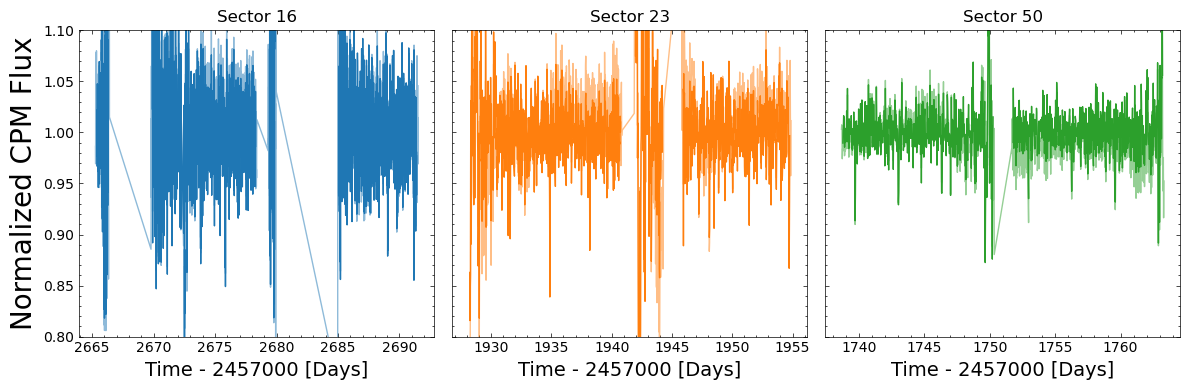

In [20]:
import pandas as pd

# for s,sector in zip([s16,s23,s50],[16,23,50]):
df1 = pd.DataFrame(np.c_[time_16+2457000, 
                   cal_psf_flux_16,
                   np.ones_like(cal_psf_flux_16)*cal_psf_flux_err_16], 
             columns=['time','flux','err']
            ).dropna()
df2 = pd.DataFrame(np.c_[time_23+2457000, 
                   cal_psf_flux_23,
                   np.ones_like(cal_psf_flux_23)*cal_psf_flux_err_23], 
             columns=['time','flux','err']
            ).dropna()
df3 = pd.DataFrame(np.c_[time_50+2457000, 
                   cal_psf_flux_50,
                   np.ones_like(cal_psf_flux_50)*cal_psf_flux_err_50], 
             columns=['time','flux','err']
            ).dropna()
df1, df2, df3

(             time      flux       err
 0    2.458739e+06  1.006225  0.010347
 1    2.458739e+06  0.995790  0.010347
 2    2.458739e+06  0.996170  0.010347
 3    2.458739e+06  0.990527  0.010347
 4    2.458739e+06  0.997943  0.010347
 ..            ...       ...       ...
 980  2.458762e+06  0.997506  0.010347
 981  2.458762e+06  0.981582  0.010347
 982  2.458762e+06  0.993318  0.010347
 983  2.458762e+06  0.999401  0.010347
 984  2.458762e+06  0.980045  0.010347
 
 [985 rows x 3 columns],
              time      flux       err
 0    2.458930e+06  0.972310  0.012294
 1    2.458930e+06  1.001828  0.012294
 2    2.458930e+06  0.995795  0.012294
 3    2.458930e+06  0.983583  0.012294
 4    2.458930e+06  0.991746  0.012294
 ..            ...       ...       ...
 929  2.458955e+06  1.005474  0.012294
 930  2.458955e+06  1.017655  0.012294
 931  2.458955e+06  1.012642  0.012294
 932  2.458955e+06  1.032607  0.012294
 933  2.458955e+06  1.010907  0.012294
 
 [934 rows x 3 columns],
          

In [21]:
df = pd.concat([df1,df2,df3], axis=0)

In [24]:
df.to_csv('../allesfitter/tess/tglc/tess.csv',index=False, header=False)

In [26]:
df1.to_csv('../data/tess_tglc_s16.csv', index=False, header=False)

In [27]:
df2.to_csv('../data/tess_tglc_s23.csv', index=False, header=False)

In [28]:
df3.to_csv('../data/tess_tglc_s50.csv', index=False, header=False)

In [25]:
import pandas as pd

df = pd.read_csv('../allesfitter/tess/tglc/tess.csv', names=['time', 'flux', 'err'])
df

,time,flux,err
0,2.458739e+06,1.006225,0.010347
1,2.458739e+06,0.995790,0.010347
2,2.458739e+06,0.996170,0.010347
3,2.458739e+06,0.990527,0.010347
4,2.458739e+06,0.997943,0.010347
...,...,...,...
4220,2.459691e+06,1.006337,0.015817
4221,2.459691e+06,1.005837,0.015817
4222,2.459691e+06,0.998844,0.015817
4223,2.459692e+06,0.995019,0.015817


In [53]:
df1 = pd.read_csv('../data/tess_tglc_s16.csv', names=['time','flux','err'])

In [54]:
df2 = pd.read_csv('../data/tess_tglc_s23.csv', names=['time','flux','err'])

In [55]:
df3 = pd.read_csv('../data/tess_tglc_s50.csv', names=['time','flux','err'])

In [56]:
import sys
sys.path.insert(0, '/home/jp/github/research/project/chronos/chronos/')

In [57]:
from gls import Gls

In [58]:
period= (3.307821,2.8e-06)
epoch = (2459401.27988518, 0.000372)
duration = (1.8008/24, 0.0097/24)

In [59]:
from wotan import flatten

df3 = df3[(df3.flux>0.9) & (df3.flux<1.05)]
time, flux, err = df3.time.values, df3.flux.values, df3.err.values
flat, trend = flatten(time, flux, method='biweight', window_length=0.5, return_trend=True)

In [60]:
%matplotlib inline

In [61]:
def get_transit_mask(time, period, t0, dur):
    """
    lc : lk.LightCurve
        lightcurve that contains time and flux properties
    """
    if dur >= 1:
        raise ValueError("dur should be in days")

    mask = []
    t0 += np.ceil((time[0] - dur - t0) / period) * period
    for t in np.arange(t0, time[-1] + dur, period):
        mask.extend(np.where(np.abs(time - t) < dur / 2.0)[0])

    return np.array(mask)
    
tmask = get_transit_mask(time, period[0], epoch[0], duration[0])
data = data = (time[~tmask], flux[~tmask], err[~tmask])
gls = Gls(data, Pbeg=0.1)

In [62]:
gls.best

{'f': 0.314729772643056,
 'P': 3.177328892662876,
 'amp': 0.013444266594074198,
 'ph': -0.003153977155047222,
 'T0': 2459671.545173999,
 'offset': 0.992545271702748,
 'e_amp': 0.0023932472100276934,
 'e_ph': 0.028331565790630935,
 'e_T0': 0.09001870256095082,
 'e_offset': 0.0016922813312663678,
 'e_f': 0.00525314234453761,
 'e_P': 0.05303267246819971}

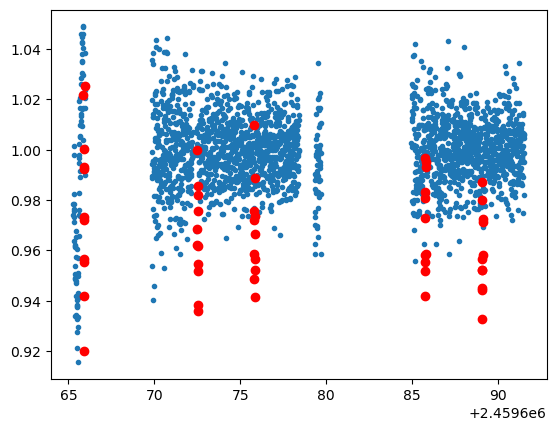

In [64]:
import matplotlib.pyplot as pl

pl.plot(time, flux, '.')
pl.plot(time[tmask], flux[tmask], 'ro')

In [87]:
from scipy import stats
from wotan import flatten
from matplotlib import rcParams
rcParams["figure.dpi"] = 150

def plot_tls_results(results, 
                     color='C0', 
                     title=None, 
                     bg_alpha=0.8, 
                     figsize=(10,5)):

    fig, axs = plt.subplot_mosaic('''
                                    AAA
                                    BBB
                                    CDE
                                    ''', 
                                  constrained_layout=True,
                                  figsize=figsize)
    ax = axs['A']
    ax.plot(results.time, results.flux, 'k-', alpha=bg_alpha)    
    ax.plot(results.time, results.trend, 'r-')
    ax.set_xlim(np.min(results.time), np.max(results.time))
    ax.set_ylabel('Relative flux')
    ax.set_title(title)
    # ax.sharex(axs['B'])
    ax.set_xticklabels([])
    
    ax = axs['B']
    ax.plot(results.time, results.flat, 'k-')
    ax.plot(results.model_lightcurve_time, results.model_lightcurve_model, color=color)
    ax.set_xlim(np.min(results.time), np.max(time))
    ax.set_xlabel(f'Time (BJD-{toffset})')
    # ax.sharex(axs['A'])
    ax.set_ylabel('Relative flux');
    
    ax = axs['C']
    ax.axvline(results.period, alpha=0.4, lw=3)
    ax.set_xlim(np.min(results.periods), np.max(results.periods))
    for n in range(2, 10):
        ax.axvline(n*results.period, alpha=0.4, lw=1, linestyle="dashed")
        ax.axvline(results.period / n, alpha=0.4, lw=1, linestyle="dashed")
    ax.set_ylabel(r'SDE')
    ax.set_xlabel('Period (days)')
    ax.plot(results.periods, results.power, color='black', lw=0.5)
    ax.set_xlim(0, max(results.periods));
    
    ax = axs['D']
    bins = 500
    bin_means, bin_edges, binnumber = stats.binned_statistic(
        results.folded_phase,
        results.folded_y,
        statistic='mean',
        bins=bins)
    bin_stds, _, _ = stats.binned_statistic(
        results.folded_phase,
        results.folded_y,
        statistic='std',
        bins=bins)
    bin_width = (bin_edges[1] - bin_edges[0])
    bin_centers = bin_edges[1:] - bin_width/2
    
    ax.plot(results.model_folded_phase, results.model_folded_model, color=color, lw=2)
    ax.scatter(results.folded_phase, results.folded_y, color='k', marker='.', alpha=bg_alpha, zorder=2)
    ax.errorbar(
        bin_centers,
        bin_means,
        yerr=bin_stds/2,
        xerr=bin_width/2,
        marker='.',
        markersize=4,
        color='black',
        #capsize=10,
        linestyle='none')
    ax.set_xlim(0.48, 0.52)
    ax.ticklabel_format(useOffset=False)
    ax.set_xlabel('Phase')
    ax.set_ylabel('Relative flux');
    
    ax = axs['E']
    ax.errorbar(np.array(results.transit_times), 
                results.transit_depths, 
                yerr=results.transit_depths_uncertainties, 
                color=color,
                marker='.', ls='')
    ax.set_xlabel(f'Transit time (BJD-{toffset})')
    ax.set_ylabel('Relative flux');
    ax.axhline(results.depth, 0, 1, ls='--')
    return fig

In [101]:
toffset = 2457000
# time = df1.time.values - toffset
# flux = df1.flux.values
# err = df1.err.values
# sector = 16
# time = df2.time.values - toffset
# flux = df2.flux.values
# err = df2.err.values
# sector = 23
time = df3.time.values - toffset
flux = df3.flux.values
err = df3.err.values
sector = 50

flat, trend = flatten(time, flux, method='biweight', window_length=0.3, return_trend=True)

In [102]:
from transitleastsquares import transitleastsquares

tls = transitleastsquares(time, flat, err)
results = tls.power(period_max=10)
results.keys()

Transit Least Squares TLS 1.0.31 (22 Nov 2021)
Creating model cache for 36 durations
Searching 2304 data points, 2250 periods from 0.601 to 9.984 days
Using all 8 CPU threads


100%|██████████████████████████████████████████| 2250/2250 periods | 00:06<00:00


Searching for best T0 for period 3.30976 days


/home/jp/miniconda3/envs/toi5671/lib/python3.11/site-packages/transitleastsquares/main.py:411: UserWarning: 3 of 8 transits without data. The true period may be twice the given period.
  warnings.warn(text)


dict_keys(['SDE', 'SDE_raw', 'chi2_min', 'chi2red_min', 'period', 'period_uncertainty', 'T0', 'duration', 'depth', 'depth_mean', 'depth_mean_even', 'depth_mean_odd', 'transit_depths', 'transit_depths_uncertainties', 'rp_rs', 'snr', 'snr_per_transit', 'snr_pink_per_transit', 'odd_even_mismatch', 'transit_times', 'per_transit_count', 'transit_count', 'distinct_transit_count', 'empty_transit_count', 'FAP', 'in_transit_count', 'after_transit_count', 'before_transit_count', 'periods', 'power', 'power_raw', 'SR', 'chi2', 'chi2red', 'model_lightcurve_time', 'model_lightcurve_model', 'model_folded_phase', 'folded_y', 'folded_dy', 'folded_phase', 'model_folded_model'])

In [103]:
results['time'] = time
results['flux'] = flux
results['flat'] = flat
results['trend'] = trend

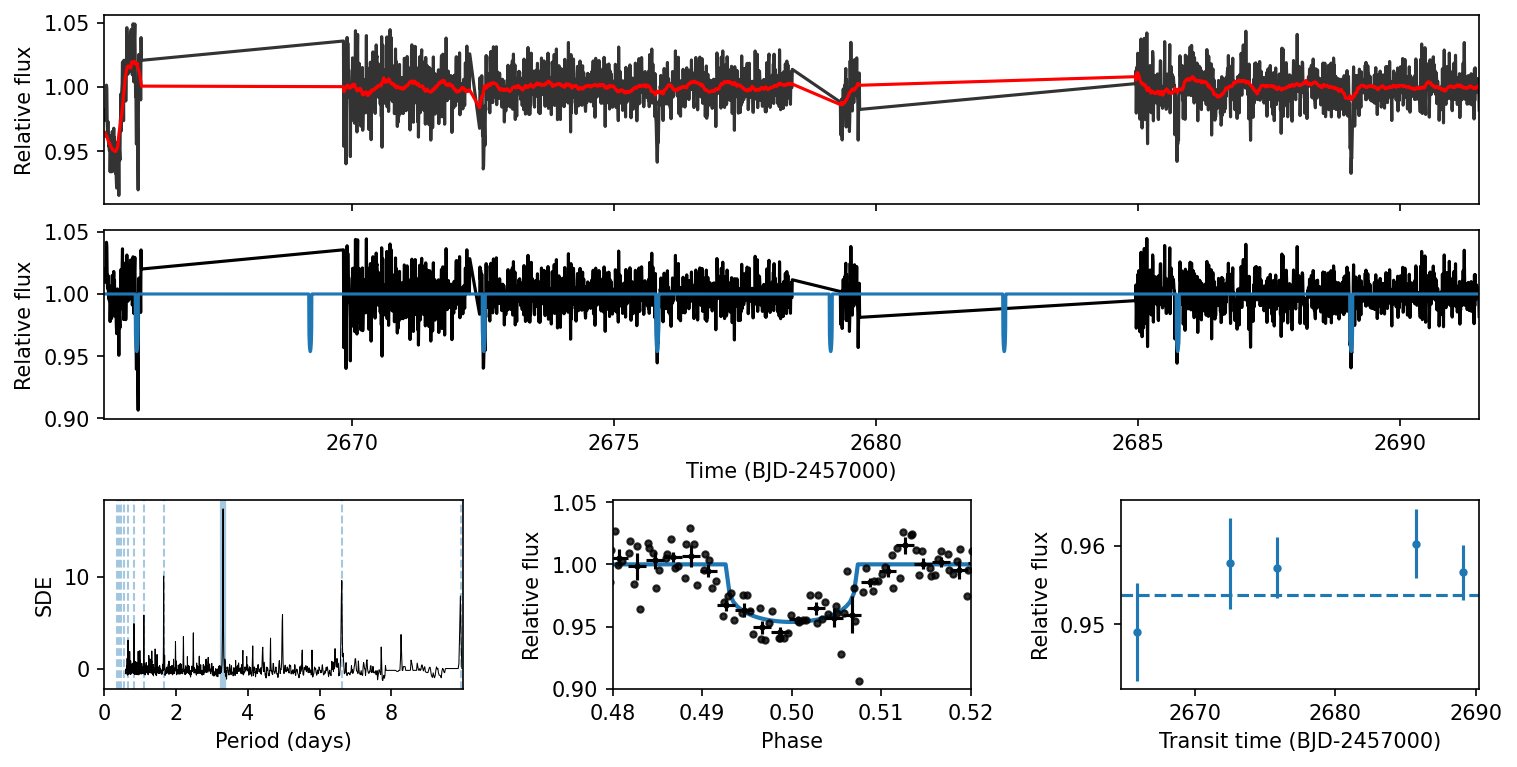

In [104]:
fig = plot_tls_results(results)

In [105]:
from aesthetic.plot import savefig

fig = plot_tls_results(results, title=f"TESS sector {sector}")

savefig(fig, f'../figures/tess_tglc_s{sector}_tls.pdf', writepdf=False)

2024-03-27T07:33:56.733585: made ../figures/tess_tglc_s50_tls.pdf
